# WGAN-GP Training

## imports

In [2]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_safari, load_cifar
from keras.preprocessing.image import ImageDataGenerator



In [3]:
RUN_ID = '0038'
RUN_FOLDER = os.path.join("./run", RUN_ID)

BATCH_SIZE = 128
IMAGE_SIZE = 32

## data

In [5]:
label = 15
(x_train, y_train) = load_cifar(label,100)
# (x_train, y_train) = load_safari('elephant')

## architecture

In [7]:
#works

gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1, 1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 256)         0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
__________

## training

In [100]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 5
    , n_critic = 5
    , using_generator = False
)

2254 (5, 1) [D loss: (-32.3)(R -2.9, F -43.9, G 1.4)] [G loss: 38.3]
2255 (5, 1) [D loss: (-27.0)(R -10.3, F -26.6, G 1.0)] [G loss: 24.8]
2256 (5, 1) [D loss: (-24.3)(R -18.5, F -11.4, G 0.6)] [G loss: 6.8]
2257 (5, 1) [D loss: (-23.4)(R -15.0, F -13.9, G 0.6)] [G loss: 12.1]
2258 (5, 1) [D loss: (-23.2)(R -26.9, F -5.2, G 0.9)] [G loss: 9.0]
2259 (5, 1) [D loss: (-22.9)(R -19.0, F -11.6, G 0.8)] [G loss: 9.0]
2260 (5, 1) [D loss: (-22.9)(R -22.6, F -7.9, G 0.8)] [G loss: 9.4]
2261 (5, 1) [D loss: (-22.3)(R -19.3, F -10.1, G 0.7)] [G loss: 9.2]
2262 (5, 1) [D loss: (-24.4)(R -27.3, F -3.9, G 0.7)] [G loss: 4.7]
2263 (5, 1) [D loss: (-24.0)(R -21.3, F -9.9, G 0.7)] [G loss: 8.3]
2264 (5, 1) [D loss: (-21.7)(R -24.7, F -5.3, G 0.8)] [G loss: 8.2]
2265 (5, 1) [D loss: (-23.1)(R -26.0, F -5.5, G 0.8)] [G loss: 5.5]
2266 (5, 1) [D loss: (-23.1)(R -23.9, F -5.5, G 0.6)] [G loss: 2.7]
2267 (5, 1) [D loss: (-23.3)(R -25.0, F -6.2, G 0.8)] [G loss: 6.8]
2268 (5, 1) [D loss: (-23.1)(R -20.5, F 

2374 (5, 1) [D loss: (-22.7)(R -22.6, F -7.0, G 0.7)] [G loss: 7.9]
2375 (5, 1) [D loss: (-23.3)(R -22.3, F -8.8, G 0.8)] [G loss: 8.0]
2376 (5, 1) [D loss: (-23.6)(R -22.0, F -7.2, G 0.6)] [G loss: 7.6]
2377 (5, 1) [D loss: (-21.7)(R -22.0, F -8.3, G 0.9)] [G loss: 6.6]
2378 (5, 1) [D loss: (-24.9)(R -25.0, F -6.0, G 0.6)] [G loss: 3.9]
2379 (5, 1) [D loss: (-23.0)(R -22.9, F -9.2, G 0.9)] [G loss: 12.1]
2380 (5, 1) [D loss: (-21.2)(R -23.6, F -6.5, G 0.9)] [G loss: 9.9]
2381 (5, 1) [D loss: (-22.9)(R -25.0, F -5.7, G 0.8)] [G loss: 7.6]
2382 (5, 1) [D loss: (-22.8)(R -23.0, F -7.3, G 0.7)] [G loss: 8.0]
2383 (5, 1) [D loss: (-22.9)(R -23.2, F -7.5, G 0.8)] [G loss: 7.5]
2384 (5, 1) [D loss: (-23.1)(R -20.6, F -8.9, G 0.6)] [G loss: 8.1]
2385 (5, 1) [D loss: (-21.7)(R -22.9, F -6.8, G 0.8)] [G loss: 8.9]
2386 (5, 1) [D loss: (-22.4)(R -23.5, F -6.5, G 0.8)] [G loss: 7.0]
2387 (5, 1) [D loss: (-22.1)(R -20.4, F -9.9, G 0.8)] [G loss: 11.1]
2388 (5, 1) [D loss: (-23.2)(R -22.9, F -7.9, 

2495 (5, 1) [D loss: (-21.8)(R -22.5, F -8.4, G 0.9)] [G loss: 7.8]
2496 (5, 1) [D loss: (-23.6)(R -25.6, F -6.9, G 0.9)] [G loss: 6.1]
2497 (5, 1) [D loss: (-24.2)(R -24.8, F -7.2, G 0.8)] [G loss: 7.0]
2498 (5, 1) [D loss: (-22.8)(R -23.5, F -6.5, G 0.7)] [G loss: 7.1]
2499 (5, 1) [D loss: (-22.1)(R -27.7, F -4.1, G 1.0)] [G loss: 7.7]
2500 (5, 1) [D loss: (-22.0)(R -22.0, F -8.3, G 0.8)] [G loss: 10.4]
2501 (5, 1) [D loss: (-23.4)(R -27.9, F -5.2, G 1.0)] [G loss: 7.4]
2502 (5, 1) [D loss: (-22.7)(R -17.8, F -10.6, G 0.6)] [G loss: 5.9]
2503 (5, 1) [D loss: (-24.8)(R -27.3, F -4.6, G 0.7)] [G loss: 3.8]
2504 (5, 1) [D loss: (-24.3)(R -22.5, F -8.7, G 0.7)] [G loss: 7.0]
2505 (5, 1) [D loss: (-22.8)(R -24.0, F -7.2, G 0.8)] [G loss: 5.7]
2506 (5, 1) [D loss: (-21.4)(R -25.4, F -4.6, G 0.9)] [G loss: 8.7]
2507 (5, 1) [D loss: (-21.5)(R -22.1, F -8.3, G 0.9)] [G loss: 9.3]
2508 (5, 1) [D loss: (-22.1)(R -20.6, F -8.8, G 0.7)] [G loss: 7.0]
2509 (5, 1) [D loss: (-24.7)(R -23.1, F -8.2, 

2616 (5, 1) [D loss: (-23.8)(R -25.6, F -5.8, G 0.8)] [G loss: 8.2]
2617 (5, 1) [D loss: (-21.5)(R -20.6, F -9.2, G 0.8)] [G loss: 7.6]
2618 (5, 1) [D loss: (-22.3)(R -24.9, F -5.5, G 0.8)] [G loss: 6.9]
2619 (5, 1) [D loss: (-24.1)(R -22.3, F -8.0, G 0.6)] [G loss: 7.3]
2620 (5, 1) [D loss: (-23.2)(R -25.3, F -5.9, G 0.8)] [G loss: 5.1]
2621 (5, 1) [D loss: (-24.0)(R -25.0, F -6.2, G 0.7)] [G loss: 4.7]
2622 (5, 1) [D loss: (-21.9)(R -24.5, F -6.7, G 0.9)] [G loss: 7.8]
2623 (5, 1) [D loss: (-23.7)(R -24.6, F -6.9, G 0.8)] [G loss: 7.7]
2624 (5, 1) [D loss: (-22.4)(R -24.1, F -6.7, G 0.8)] [G loss: 6.0]
2625 (5, 1) [D loss: (-24.5)(R -26.7, F -5.0, G 0.7)] [G loss: 3.2]
2626 (5, 1) [D loss: (-22.9)(R -27.1, F -4.3, G 0.8)] [G loss: 6.2]
2627 (5, 1) [D loss: (-23.6)(R -21.1, F -10.6, G 0.8)] [G loss: 9.2]
2628 (5, 1) [D loss: (-21.7)(R -23.1, F -7.2, G 0.9)] [G loss: 6.8]
2629 (5, 1) [D loss: (-22.2)(R -23.8, F -6.3, G 0.8)] [G loss: 5.9]
2630 (5, 1) [D loss: (-23.5)(R -24.1, F -7.2, G

2737 (5, 1) [D loss: (-24.1)(R -25.8, F -5.8, G 0.7)] [G loss: 6.5]
2738 (5, 1) [D loss: (-23.6)(R -25.6, F -5.9, G 0.8)] [G loss: 5.9]
2739 (5, 1) [D loss: (-23.7)(R -22.9, F -8.0, G 0.7)] [G loss: 8.8]
2740 (5, 1) [D loss: (-21.9)(R -27.1, F -4.2, G 0.9)] [G loss: 6.1]
2741 (5, 1) [D loss: (-25.1)(R -23.6, F -8.8, G 0.7)] [G loss: 8.3]
2742 (5, 1) [D loss: (-22.7)(R -24.9, F -6.1, G 0.8)] [G loss: 7.4]
2743 (5, 1) [D loss: (-22.9)(R -24.9, F -5.7, G 0.8)] [G loss: 6.2]
2744 (5, 1) [D loss: (-21.7)(R -26.3, F -4.3, G 0.9)] [G loss: 6.9]
2745 (5, 1) [D loss: (-23.2)(R -24.1, F -7.1, G 0.8)] [G loss: 7.2]
2746 (5, 1) [D loss: (-22.3)(R -24.3, F -6.6, G 0.9)] [G loss: 8.7]
2747 (5, 1) [D loss: (-22.1)(R -25.9, F -6.3, G 1.0)] [G loss: 10.0]
2748 (5, 1) [D loss: (-23.2)(R -26.7, F -4.4, G 0.8)] [G loss: 6.9]
2749 (5, 1) [D loss: (-24.1)(R -21.9, F -8.8, G 0.6)] [G loss: 4.8]
2750 (5, 1) [D loss: (-23.1)(R -27.6, F -5.5, G 1.0)] [G loss: 7.9]
2751 (5, 1) [D loss: (-22.8)(R -22.5, F -6.8, G

2858 (5, 1) [D loss: (-22.0)(R -23.3, F -7.3, G 0.9)] [G loss: 8.7]
2859 (5, 1) [D loss: (-23.5)(R -26.4, F -5.2, G 0.8)] [G loss: 10.0]
2860 (5, 1) [D loss: (-24.7)(R -26.4, F -6.4, G 0.8)] [G loss: 3.6]
2861 (5, 1) [D loss: (-24.2)(R -26.9, F -4.9, G 0.8)] [G loss: 4.0]
2862 (5, 1) [D loss: (-25.4)(R -24.4, F -7.8, G 0.7)] [G loss: 5.8]
2863 (5, 1) [D loss: (-23.1)(R -23.1, F -8.7, G 0.9)] [G loss: 7.9]
2864 (5, 1) [D loss: (-22.1)(R -23.9, F -6.7, G 0.9)] [G loss: 9.9]
2865 (5, 1) [D loss: (-23.4)(R -22.8, F -8.1, G 0.7)] [G loss: 8.6]
2866 (5, 1) [D loss: (-21.9)(R -21.0, F -8.9, G 0.8)] [G loss: 11.6]
2867 (5, 1) [D loss: (-22.9)(R -21.7, F -8.7, G 0.7)] [G loss: 8.1]
2868 (5, 1) [D loss: (-22.1)(R -27.3, F -5.4, G 1.1)] [G loss: 6.0]
2869 (5, 1) [D loss: (-23.4)(R -29.2, F -3.2, G 0.9)] [G loss: 4.7]
2870 (5, 1) [D loss: (-23.0)(R -24.3, F -6.8, G 0.8)] [G loss: 6.3]
2871 (5, 1) [D loss: (-22.7)(R -22.0, F -8.9, G 0.8)] [G loss: 7.4]
2872 (5, 1) [D loss: (-24.3)(R -28.4, F -4.4, 

2979 (5, 1) [D loss: (-24.4)(R -23.1, F -8.3, G 0.7)] [G loss: 7.2]
2980 (5, 1) [D loss: (-22.5)(R -20.3, F -11.6, G 0.9)] [G loss: 12.4]
2981 (5, 1) [D loss: (-24.6)(R -24.0, F -7.8, G 0.7)] [G loss: 8.2]
2982 (5, 1) [D loss: (-22.7)(R -25.0, F -5.8, G 0.8)] [G loss: 6.2]
2983 (5, 1) [D loss: (-23.3)(R -23.5, F -8.0, G 0.8)] [G loss: 10.8]
2984 (5, 1) [D loss: (-23.5)(R -23.2, F -8.2, G 0.8)] [G loss: 7.8]
2985 (5, 1) [D loss: (-24.2)(R -24.1, F -7.4, G 0.7)] [G loss: 6.7]
2986 (5, 1) [D loss: (-22.8)(R -27.7, F -4.1, G 0.9)] [G loss: 4.6]
2987 (5, 1) [D loss: (-23.4)(R -23.1, F -7.4, G 0.7)] [G loss: 6.8]
2988 (5, 1) [D loss: (-24.3)(R -26.1, F -7.1, G 0.9)] [G loss: 7.2]
2989 (5, 1) [D loss: (-24.4)(R -23.3, F -9.1, G 0.8)] [G loss: 9.4]
2990 (5, 1) [D loss: (-25.1)(R -26.4, F -7.2, G 0.8)] [G loss: 5.7]
2991 (5, 1) [D loss: (-23.1)(R -27.9, F -5.3, G 1.0)] [G loss: 7.8]
2992 (5, 1) [D loss: (-23.6)(R -21.9, F -8.7, G 0.7)] [G loss: 7.5]
2993 (5, 1) [D loss: (-24.0)(R -25.1, F -6.1,

3100 (5, 1) [D loss: (-24.8)(R -25.3, F -8.4, G 0.9)] [G loss: 8.1]
3101 (5, 1) [D loss: (-22.7)(R -23.4, F -7.5, G 0.8)] [G loss: 6.6]
3102 (5, 1) [D loss: (-22.7)(R -19.4, F -9.4, G 0.6)] [G loss: 6.3]
3103 (5, 1) [D loss: (-24.4)(R -24.5, F -8.5, G 0.8)] [G loss: 7.8]
3104 (5, 1) [D loss: (-24.8)(R -27.7, F -5.4, G 0.8)] [G loss: 6.1]
3105 (5, 1) [D loss: (-23.3)(R -27.3, F -5.8, G 1.0)] [G loss: 7.6]
3106 (5, 1) [D loss: (-23.5)(R -24.5, F -6.5, G 0.8)] [G loss: 8.1]
3107 (5, 1) [D loss: (-21.5)(R -22.9, F -6.4, G 0.8)] [G loss: 7.8]
3108 (5, 1) [D loss: (-22.7)(R -21.2, F -9.1, G 0.8)] [G loss: 9.7]
3109 (5, 1) [D loss: (-23.7)(R -28.5, F -4.3, G 0.9)] [G loss: 8.1]
3110 (5, 1) [D loss: (-24.3)(R -23.0, F -8.8, G 0.7)] [G loss: 7.6]
3111 (5, 1) [D loss: (-24.1)(R -29.6, F -5.5, G 1.1)] [G loss: 4.4]
3112 (5, 1) [D loss: (-24.4)(R -24.8, F -6.5, G 0.7)] [G loss: 7.4]
3113 (5, 1) [D loss: (-23.3)(R -24.8, F -7.2, G 0.9)] [G loss: 8.7]
3114 (5, 1) [D loss: (-25.3)(R -24.1, F -7.8, G 

3221 (5, 1) [D loss: (-23.3)(R -25.0, F -6.3, G 0.8)] [G loss: 6.2]
3222 (5, 1) [D loss: (-22.0)(R -21.4, F -7.8, G 0.7)] [G loss: 7.3]
3223 (5, 1) [D loss: (-24.2)(R -26.1, F -6.6, G 0.8)] [G loss: 5.5]
3224 (5, 1) [D loss: (-22.5)(R -21.3, F -8.2, G 0.7)] [G loss: 8.3]
3225 (5, 1) [D loss: (-23.9)(R -27.3, F -4.8, G 0.8)] [G loss: 5.9]
3226 (5, 1) [D loss: (-25.0)(R -27.3, F -6.0, G 0.8)] [G loss: 5.8]
3227 (5, 1) [D loss: (-23.7)(R -23.1, F -8.2, G 0.8)] [G loss: 8.2]
3228 (5, 1) [D loss: (-22.6)(R -27.0, F -4.8, G 0.9)] [G loss: 5.4]
3229 (5, 1) [D loss: (-24.0)(R -23.7, F -7.7, G 0.7)] [G loss: 9.4]
3230 (5, 1) [D loss: (-25.0)(R -22.5, F -9.8, G 0.7)] [G loss: 6.2]
3231 (5, 1) [D loss: (-23.3)(R -25.8, F -5.7, G 0.8)] [G loss: 6.2]
3232 (5, 1) [D loss: (-23.7)(R -24.3, F -6.6, G 0.7)] [G loss: 6.3]
3233 (5, 1) [D loss: (-23.7)(R -25.6, F -6.9, G 0.9)] [G loss: 8.3]
3234 (5, 1) [D loss: (-22.4)(R -21.2, F -10.1, G 0.9)] [G loss: 10.8]
3235 (5, 1) [D loss: (-23.6)(R -23.6, F -7.4, 

3342 (5, 1) [D loss: (-22.9)(R -25.4, F -6.4, G 0.9)] [G loss: 8.1]
3343 (5, 1) [D loss: (-21.8)(R -23.3, F -7.5, G 0.9)] [G loss: 9.4]
3344 (5, 1) [D loss: (-23.9)(R -27.9, F -5.2, G 0.9)] [G loss: 6.2]
3345 (5, 1) [D loss: (-24.2)(R -23.8, F -8.0, G 0.8)] [G loss: 8.7]
3346 (5, 1) [D loss: (-23.1)(R -19.7, F -10.2, G 0.7)] [G loss: 8.5]
3347 (5, 1) [D loss: (-23.7)(R -24.8, F -6.5, G 0.8)] [G loss: 7.0]
3348 (5, 1) [D loss: (-23.0)(R -29.8, F -3.8, G 1.1)] [G loss: 6.7]
3349 (5, 1) [D loss: (-24.9)(R -23.1, F -9.6, G 0.8)] [G loss: 8.4]
3350 (5, 1) [D loss: (-24.5)(R -25.9, F -6.7, G 0.8)] [G loss: 6.0]
3351 (5, 1) [D loss: (-26.4)(R -28.2, F -5.9, G 0.8)] [G loss: 4.2]
3352 (5, 1) [D loss: (-23.7)(R -21.9, F -8.4, G 0.7)] [G loss: 8.7]
3353 (5, 1) [D loss: (-22.1)(R -23.2, F -8.2, G 0.9)] [G loss: 9.4]
3354 (5, 1) [D loss: (-23.0)(R -29.1, F -4.4, G 1.1)] [G loss: 6.7]
3355 (5, 1) [D loss: (-24.9)(R -24.2, F -7.5, G 0.7)] [G loss: 6.8]
3356 (5, 1) [D loss: (-23.0)(R -25.5, F -7.0, G

3463 (5, 1) [D loss: (-24.7)(R -24.4, F -7.3, G 0.7)] [G loss: 6.1]
3464 (5, 1) [D loss: (-23.7)(R -22.9, F -8.7, G 0.8)] [G loss: 8.4]
3465 (5, 1) [D loss: (-21.6)(R -22.2, F -6.7, G 0.7)] [G loss: 7.8]
3466 (5, 1) [D loss: (-23.6)(R -25.3, F -6.4, G 0.8)] [G loss: 5.4]
3467 (5, 1) [D loss: (-24.7)(R -22.0, F -9.8, G 0.7)] [G loss: 9.1]
3468 (5, 1) [D loss: (-24.0)(R -25.3, F -6.9, G 0.8)] [G loss: 5.4]
3469 (5, 1) [D loss: (-23.0)(R -27.8, F -5.4, G 1.0)] [G loss: 7.8]
3470 (5, 1) [D loss: (-24.5)(R -25.5, F -8.0, G 0.9)] [G loss: 6.5]
3471 (5, 1) [D loss: (-24.0)(R -26.2, F -6.4, G 0.9)] [G loss: 7.5]
3472 (5, 1) [D loss: (-23.8)(R -26.0, F -6.4, G 0.9)] [G loss: 4.9]
3473 (5, 1) [D loss: (-23.6)(R -25.1, F -8.1, G 1.0)] [G loss: 7.6]
3474 (5, 1) [D loss: (-23.0)(R -23.4, F -8.6, G 0.9)] [G loss: 11.1]
3475 (5, 1) [D loss: (-24.3)(R -28.0, F -5.5, G 0.9)] [G loss: 7.9]
3476 (5, 1) [D loss: (-24.2)(R -23.2, F -7.3, G 0.6)] [G loss: 6.9]
3477 (5, 1) [D loss: (-24.4)(R -25.9, F -6.6, G

3584 (5, 1) [D loss: (-25.8)(R -22.6, F -10.3, G 0.7)] [G loss: 10.2]
3585 (5, 1) [D loss: (-22.2)(R -24.2, F -5.8, G 0.8)] [G loss: 7.2]
3586 (5, 1) [D loss: (-24.0)(R -26.2, F -5.4, G 0.8)] [G loss: 5.8]
3587 (5, 1) [D loss: (-25.4)(R -24.9, F -8.8, G 0.8)] [G loss: 7.2]
3588 (5, 1) [D loss: (-23.4)(R -26.0, F -6.9, G 1.0)] [G loss: 9.4]
3589 (5, 1) [D loss: (-23.0)(R -25.4, F -6.1, G 0.8)] [G loss: 5.3]
3590 (5, 1) [D loss: (-23.3)(R -26.7, F -4.3, G 0.8)] [G loss: 5.1]
3591 (5, 1) [D loss: (-22.3)(R -21.0, F -9.6, G 0.8)] [G loss: 9.3]
3592 (5, 1) [D loss: (-24.1)(R -23.9, F -8.0, G 0.8)] [G loss: 7.5]
3593 (5, 1) [D loss: (-23.9)(R -23.7, F -8.2, G 0.8)] [G loss: 6.4]
3594 (5, 1) [D loss: (-25.4)(R -26.9, F -5.4, G 0.7)] [G loss: 4.8]
3595 (5, 1) [D loss: (-22.8)(R -24.7, F -5.8, G 0.8)] [G loss: 6.6]
3596 (5, 1) [D loss: (-24.1)(R -25.8, F -7.2, G 0.9)] [G loss: 7.1]


KeyboardInterrupt: 

In [ ]:
gan.generator_learning_rate = 0.00005
gan.critic_learning_rate = 0.00005
gan.grad_weight = 10
gan._build_adversarial()

In [ ]:
gan.critic_model.metrics_names

In [ ]:
# Check weights updating

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN CRITIC ---')
noise = np.random.normal(0, 1, (BATCH_SIZE, 100))
gen_imgs = gan.generator.predict(noise)
gan.train_critic(x_train, batch_size = BATCH_SIZE, using_generator = True)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN GENERATOR ---')
gan.train_generator(batch_size = BATCH_SIZE)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])

In [ ]:
check = True
while check :

    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty
    
    true_imgs = next(x_train)[0]
    if true_imgs.shape[0] != BATCH_SIZE:
        true_imgs = next(x_train)[0]

    noise = np.random.normal(0, 1, (BATCH_SIZE, 100))
    
    d_loss = gan.critic_model.train_on_batch([true_imgs, noise], [valid, fake, dummy])
    # Plot the progress
    print ("[D loss: (%.1f)(R %.1f, F %.1f, G %.1f)]" % (d_loss[0], d_loss[1],d_loss[2],d_loss[3]))
    
    d_loss = gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy])
    # Plot the progress
    print ("[D loss: (%.1f)(R %.1f, F %.1f, G %.1f)]" % (d_loss[0], d_loss[1],d_loss[2],d_loss[3]))
    

    print(gan.model.test_on_batch(noise, valid))
    
    
    
#     check = d_loss[4]<0.5 or d_loss[5]<0.5

In [84]:
check = True
while check:
    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty
    noise = np.random.normal(0, 1, (BATCH_SIZE,100))

    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]
    
    
#     g_loss = gan.train_generator(batch_size = BATCH_SIZE)
    g_loss = gan.model.train_on_batch(noise, valid)
    # Plot the progress
    print ("[G loss: %.1f]" % (g_loss))
    
    g_loss = gan.model.test_on_batch(noise, valid)
    print ("[G loss: %.1f]" % (g_loss))
    
    
    print(gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy]))



[G loss: 3.2]
[G loss: 3.3]
[-22.121075, -25.211803, -3.2552488, 0.6345977]
[G loss: 2.6]
[G loss: 2.5]
[-21.61019, -25.328548, -2.531402, 0.62497616]
[G loss: 2.0]
[G loss: 2.0]
[-21.308361, -25.931541, -2.0185626, 0.6641742]
[G loss: 1.6]
[G loss: 1.5]
[-19.250443, -24.310263, -1.4804598, 0.65402806]
[G loss: 1.1]
[G loss: 1.6]
[-21.209583, -26.044588, -1.6487937, 0.6483799]


KeyboardInterrupt: 

array([0.6441779], dtype=float32)

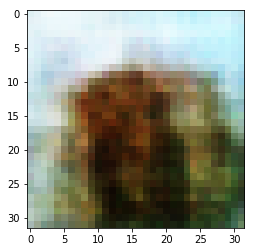

In [99]:
noise = np.random.normal(0, 1, (BATCH_SIZE,100))
img = gan.generator.predict(np.array([noise[0]]))[0]

plt.imshow(np.clip((img+1)*0.5,0,1))

gan.critic.predict(np.array([img]))[0]

[-44.679523]


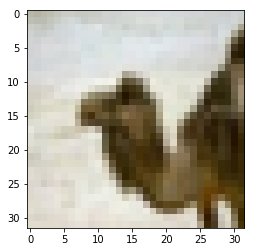

In [39]:
img = x_train[30]
print(gan.critic.predict(np.array([img]))[0])
plt.imshow((img + 1) * 0.5)

In [ ]:
valid = np.ones((BATCH_SIZE,1))
noise = np.random.normal(0, 1, (BATCH_SIZE,100))

In [ ]:
print(gan.model.test_on_batch(noise, valid))

In [ ]:
print(gan.model.train_on_batch(noise, valid))

In [ ]:
valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
dummy = np.zeros((BATCH_SIZE128, 1), dtype=np.float32) # Dummy gt for gradient penalty

true_imgs = next(x_train)[0]


In [ ]:
print(gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy]))


In [ ]:
print(gan.critic_model.train_on_batch([true_imgs, noise], [valid, fake, dummy]))


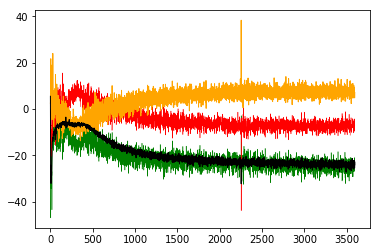

In [101]:
plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot(gan.g_losses, color='orange', linewidth=1)

plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=1)



In [103]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [105]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.close()